In [1]:
import polars as pl
from schema import *
from plot_utils.custom_plot_horizontal_bars_001 import *
from datetime import datetime
from schema import *
from dateutil.relativedelta import relativedelta

operations = pl.read_parquet("operations.parquet").sort(datetime_cn)
operations

datetime,amount,description,debt,ope_source,ope_type
datetime[μs],f64,str,f64,str,str
2024-06-05 00:00:00,47040.0,null,0.0,"""loan""","""down payment"""
2024-06-05 00:00:00,-4640.0,null,0.0,"""loan""","""extended guarantee"""
2024-06-05 00:00:00,-11057.2,null,null,"""loan""","""car_insurance_cn"""
2024-06-05 00:00:00,-4200.0,null,null,"""loan""","""live_insurance_cn"""
2024-06-05 00:00:00,-7500.0,null,null,"""loan""","""accessories"""
…,…,…,…,…,…
2025-03-10 00:00:00,3000.0,null,92717.91,"""busyness""","""inflow"""
2025-03-17 00:00:00,3000.0,null,92717.91,"""busyness""","""inflow"""
2025-03-17 00:00:00,-428.57,"""Trouble with uber fleet SAT ce…",92717.91,"""busyness""","""business_expenses"""


In [2]:


start_date = operations[datetime_cn].min()
end_date = start_date + relativedelta(years=5)

operation_days = operations[datetime_cn].max() - start_date
car_cash_price = 235_000.0

dophymini_cash_price = 350_000.0
operations = operations.with_columns(
    pl.col(amount_cn) * dophymini_cash_price / car_cash_price
)

debt = 92_717.91 + (dophymini_cash_price - car_cash_price)

car_cash_price = dophymini_cash_price
depreciation_5y_rate = 0.46
operation_years = operation_days.days / (end_date - start_date).days
car_depreciation = car_cash_price * depreciation_5y_rate * operation_years

y_ticks_map = {
    car_insurance_cn: "Seguro daños",
    monthly_interests_cv: "Intereses",
    life_insurance_cn: "Seguro de vida",
    maintenance_cv: "Mantenimientos y/o Servicios",
    business_expenses_cv: "Gastos de operaciones",
    extended_guarantee_cv: "Garantía extendida",
    car_gps_cv: "Zeek (GPS/Localizador)",
    taxes_cv: "Impuestos",
    monthly_payment_cv: "Pago mensual",
    down_payment_cv: "Enganche",
    profit_cv: "Ganancias",
    revenue_cv: "Ingresos",
    capital_repayment_cv: "Abono a capital",
    purchase_value_cv: "Precio de compra",
    depreciation_cv: "Depreciación",
    'profit': "Ganancia",
    'expense': "Gasto",
    accessories_cv: "Accesorios",
    debt_cn: "Deuda",
}

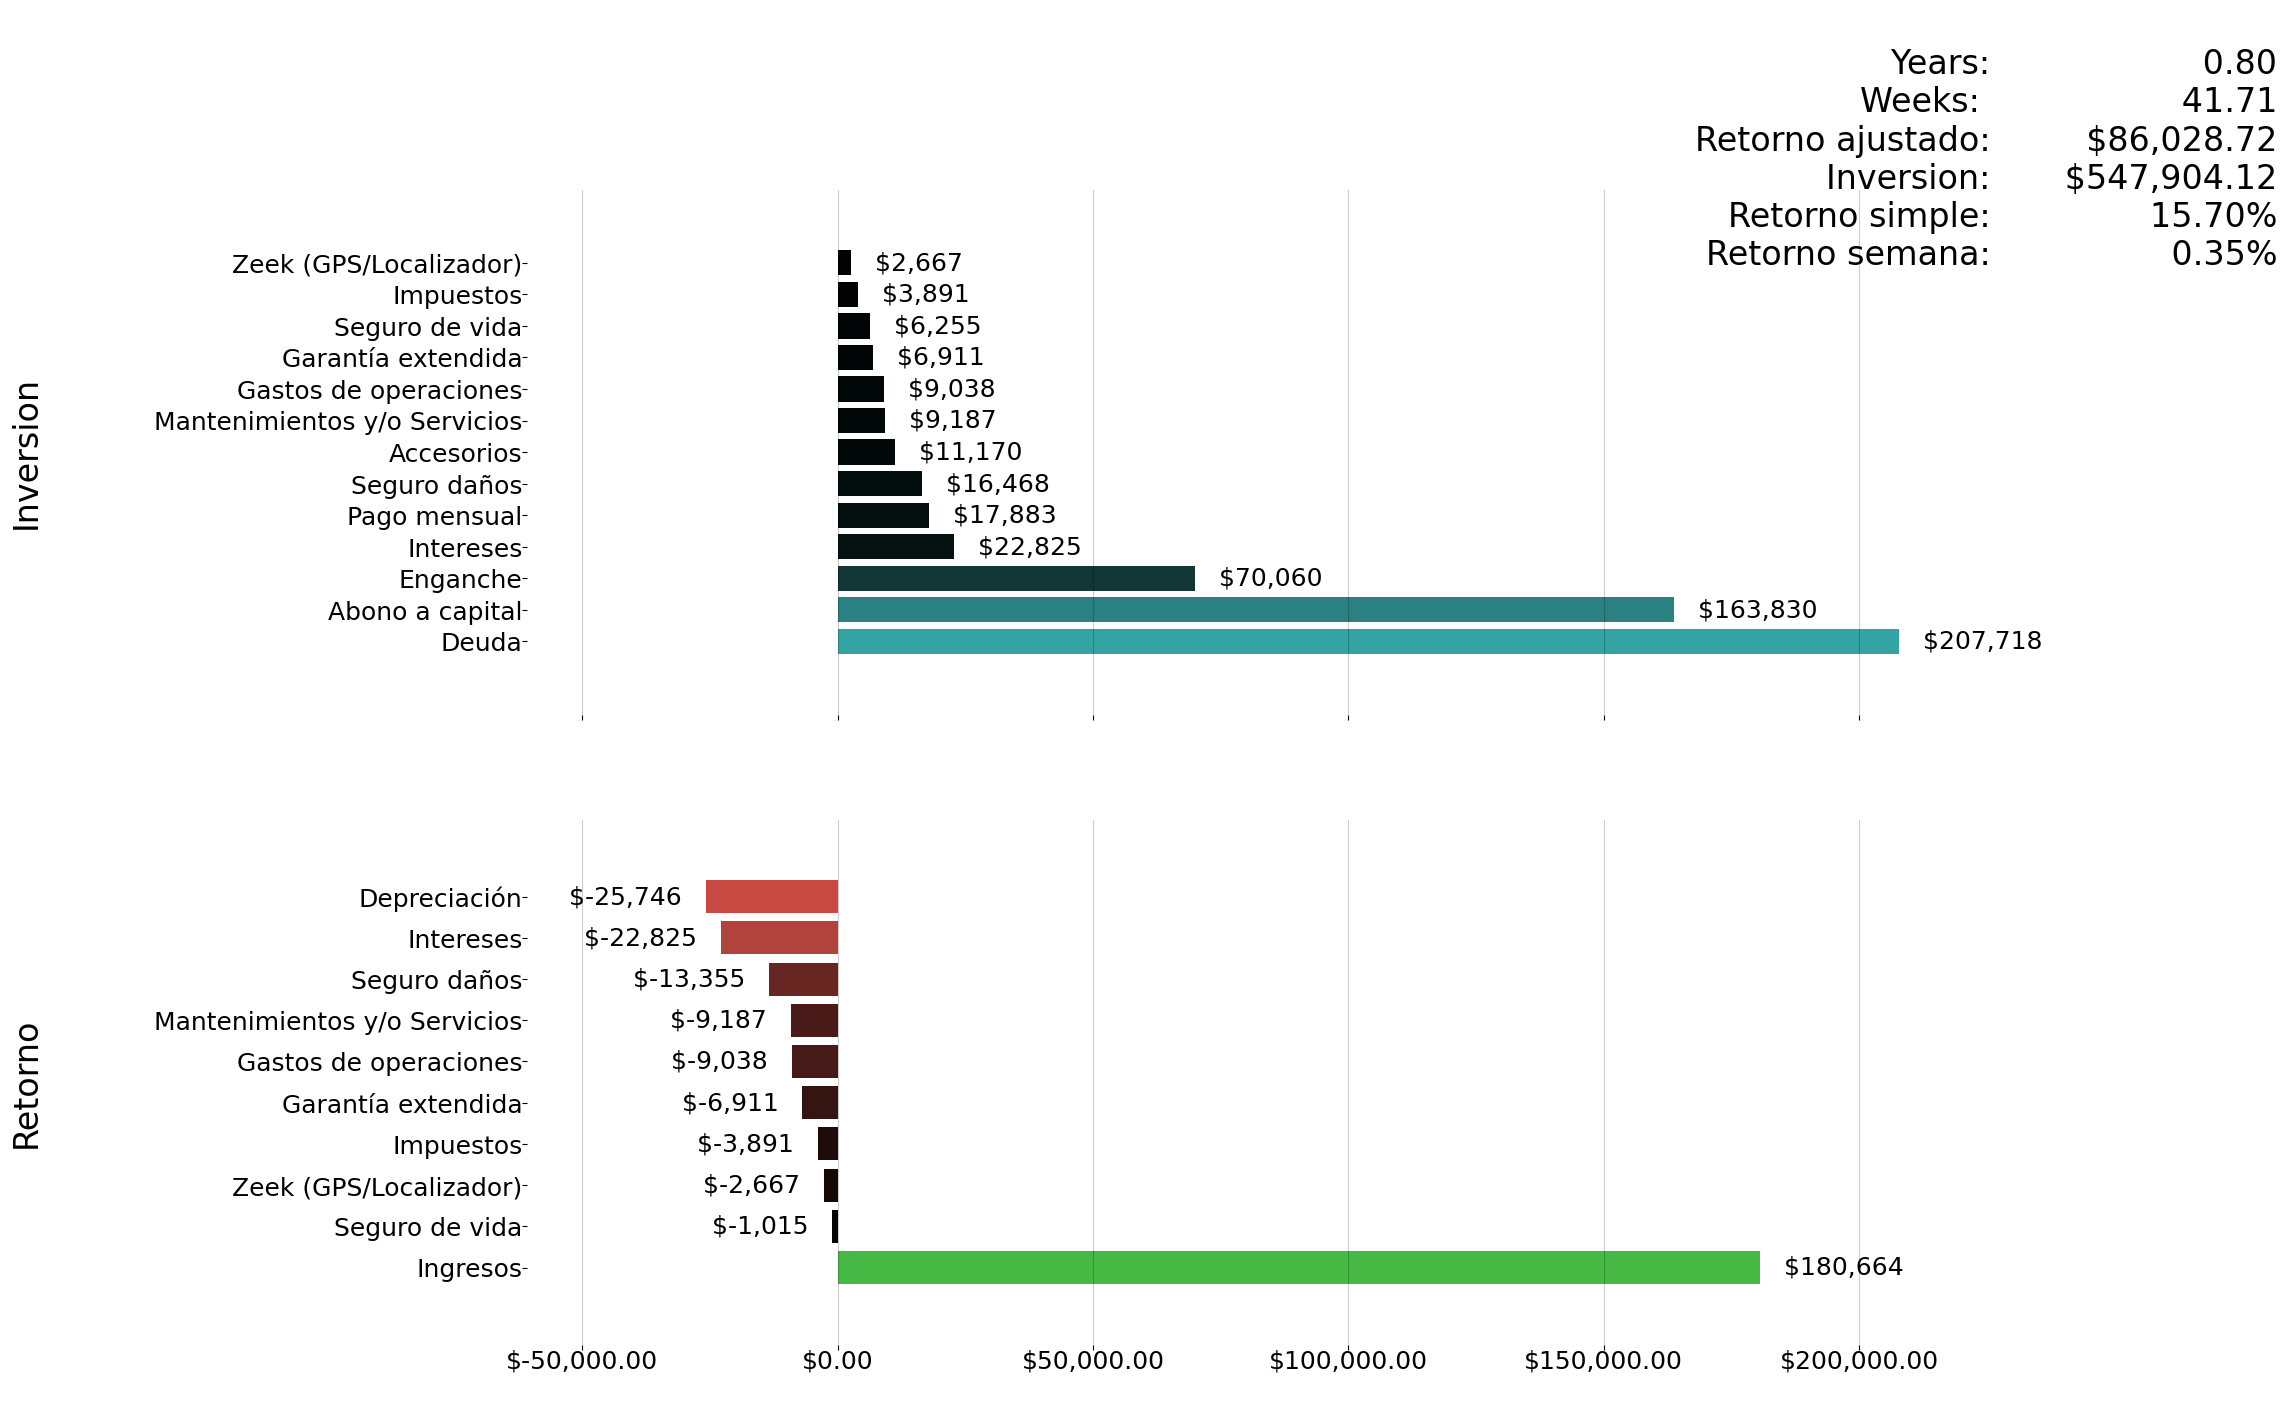

In [3]:
plot_report(
    operations=operations,
    debt=debt,
    car_depreciation=car_depreciation,
    operation_days=operation_days,
    y_ticks_map=y_ticks_map,
)


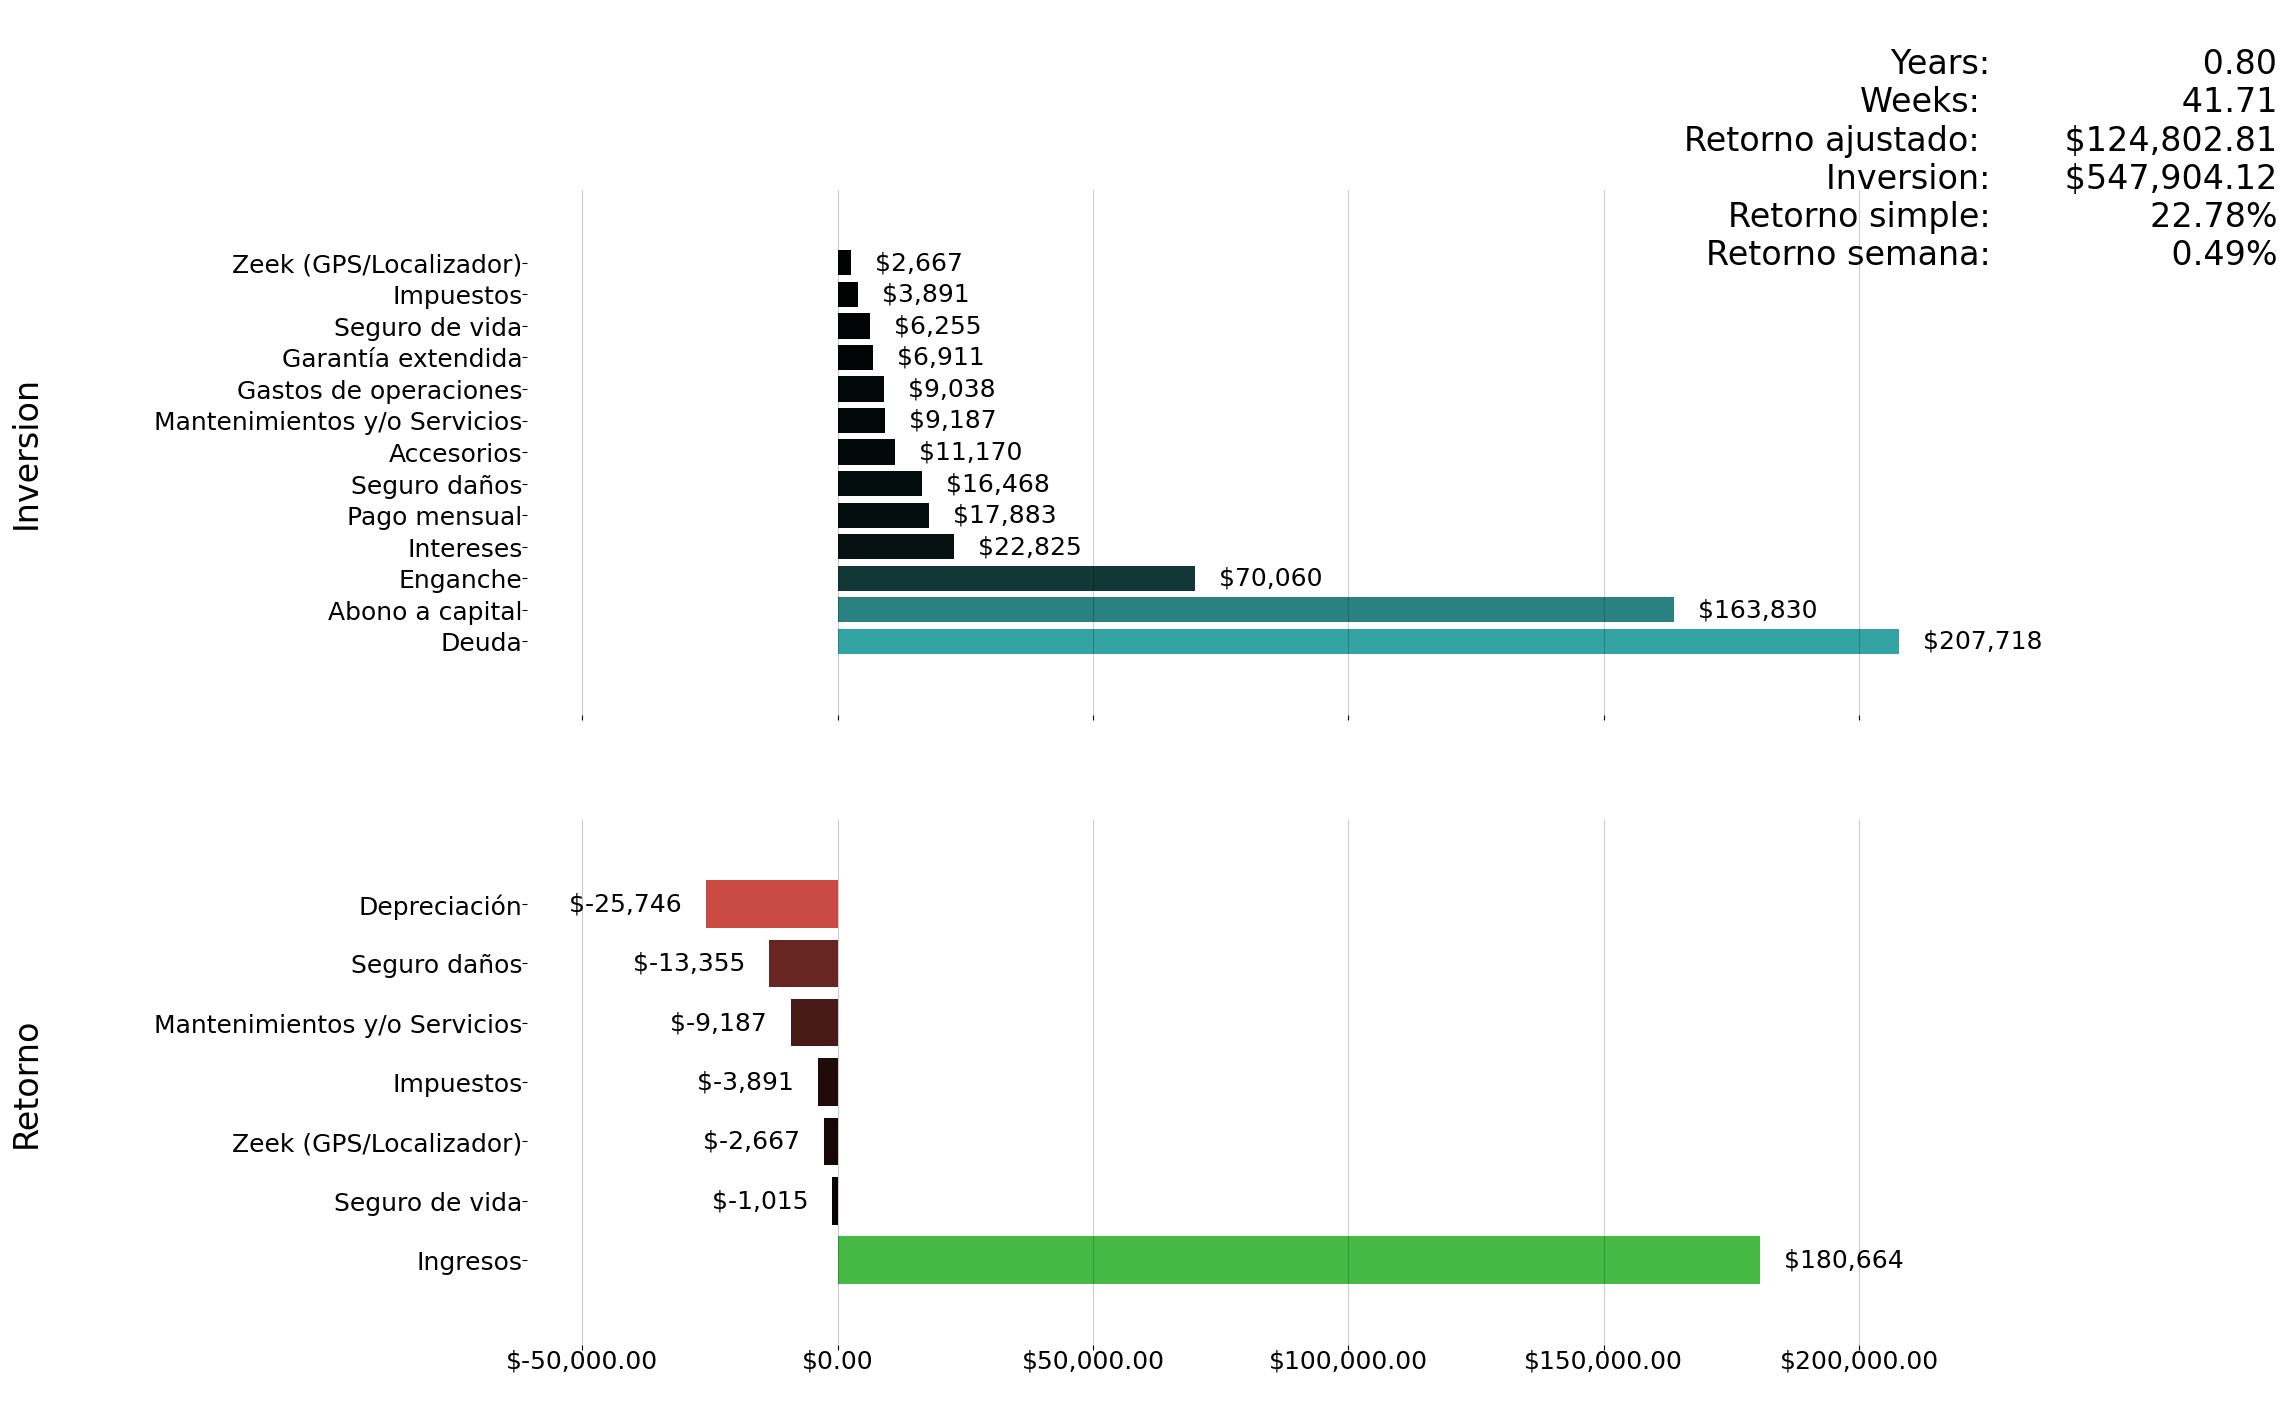

In [4]:
plot_report(
    operations=operations,
    debt=debt,
    car_depreciation=car_depreciation,
    operation_days=operation_days,
    y_ticks_map=y_ticks_map,
    revenue_columns=(
        taxes_cv,
        car_gps_cv,
        life_insurance_cn,
        maintenance_cv,
        car_insurance_cn,
        revenue_cv,
        monthly_car_interest_payment_cv,
        monthly_car_loan_taxes_cv,
        monthly_life_insurance_capital_repayment_cv,
        monthly_life_insurance_interest_payment_cv,
        monthly_life_insurance_loan_taxes_cv,
        monthly_car_insurance_capital_repayment_cv,
        monthly_car_insurance_interest_payment_cv,
        monthly_car_insurance_loan_taxes_cv
    )
)

In [5]:
operations

datetime,amount,description,debt,ope_source,ope_type
datetime[μs],f64,str,f64,str,str
2024-06-05 00:00:00,70059.574468,null,0.0,"""loan""","""down payment"""
2024-06-05 00:00:00,-6910.638298,null,0.0,"""loan""","""extended guarantee"""
2024-06-05 00:00:00,-16468.170213,null,null,"""loan""","""car_insurance_cn"""
2024-06-05 00:00:00,-6255.319149,null,null,"""loan""","""live_insurance_cn"""
2024-06-05 00:00:00,-11170.212766,null,null,"""loan""","""accessories"""
…,…,…,…,…,…
2025-03-10 00:00:00,4468.085106,null,92717.91,"""busyness""","""inflow"""
2025-03-17 00:00:00,4468.085106,null,92717.91,"""busyness""","""inflow"""
2025-03-17 00:00:00,-638.295745,"""Trouble with uber fleet SAT ce…",92717.91,"""busyness""","""business_expenses"""


In [6]:
225 * 7

1575